In [1]:
import cv2 as cv
import numpy as np
import math


def cv_show(name, img):
    '''
     显示图像
    '''
    cv.imshow(name, img)
    cv.waitKey()
    cv.destroyAllWindows()

def bit_plain_slice(img):
    '''
     位平面切片
    '''
    (h, w) = img.shape
    bit_mask = np.zeros((h, w, 8), dtype=np.uint8)
    for i in range(8):
        bit_mask[:, :, i] = 2**i
    result_img = np.zeros((h, w, 8), dtype=np.uint8)
    cv_show("img_origin", img)
    for i in range(8):
        result_img[:, :, i] = cv.bitwise_and(img, bit_mask[:, :, i])
        # 为了更加清楚要将大于零的数处理成255
        mask = result_img[:, :, i] > 0
        result_img[mask] = 255
        cv_show(str(i), result_img[:, :, i])
img = cv.imread("D:/picture/school.jpg", 0)
bit_plain_slice(img)

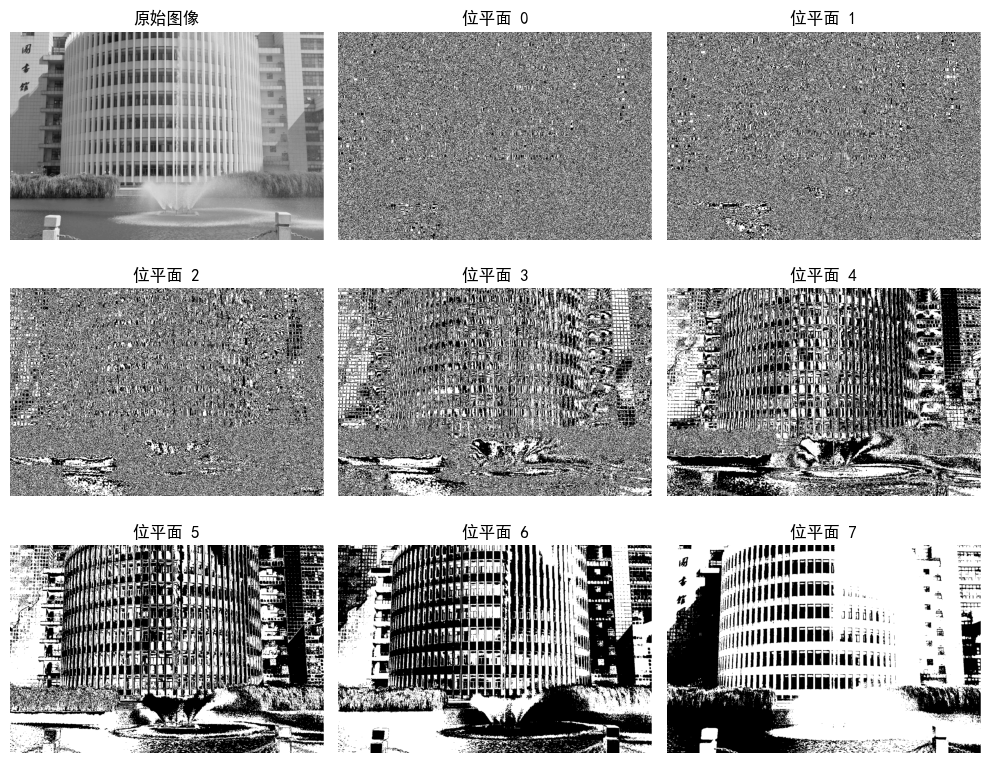

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def bit_plain_slice(img):
    '''
    位平面切片
    '''
    (h, w) = img.shape
    bit_mask = np.zeros((h, w, 8), dtype=np.uint8)
    
    for i in range(8):
        bit_mask[:, :, i] = 2**i
        
    result_img = np.zeros((h, w, 8), dtype=np.uint8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
    plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    # 创建图形窗口
    plt.figure(figsize=(10, 8))
    plt.subplot(3, 3, 1)  # 原始图像放在第一个子图
    plt.imshow(img, cmap='gray')
    plt.title('原始图像')
    plt.axis('off')
    

    for i in range(8):
        result_img[:, :, i] = cv.bitwise_and(img, bit_mask[:, :, i])
        
        # 为了更加清楚要将大于零的数处理成255
        mask = result_img[:, :, i] > 0
        result_img[mask] = 255
        
        plt.subplot(3, 3, i + 2)  # 从第二个子图开始放置位平面
        plt.imshow(result_img[:, :, i], cmap='gray')
        plt.title(f'位平面 {i}')
        plt.axis('off')

    plt.tight_layout()  # 调整子图间距
    plt.show()

img = cv.imread("D:/picture/school.png", 0)
bit_plain_slice(img)
